# Week2授業前課題1
1. 【課題】統計基礎用語の説明
2. 【課題】データ点の作成
3. 【課題】データ点へのラベル付け
4. 【課題】正しくラベル付けされているか見てみる

## 【課題】統計基礎用語の説明
Q1. 標準偏差について、分散との違いや関係性、どんな時に使う指標なのかをお答えください。
Q2. 共分散行列について述べてください。
Q3. 1次元の正規分布と多次元の正規分布について述べてください。特にどういう時に使うのかについてお答えください。

A1. 標準偏差の分散も、データのバラツキ度合いを示す指標のこと。標準偏差と分散は、異なる計算式で求められる。
これらの違いを理解しておかないとデータのバラツキを表現した際に、認識がずれたり、誤った解釈をしてしまうことがある。

はじめに分散、つぎに標準偏差の順番で学ぶと理解しやすい。

分散は、データの集合体の各値と、その平均との差を2乗した値の平均のこと。
データの集合の中から各値の平均を算出する。その後、各値ごとにその平均との差を算出。その差を2乗したものをデータの個数で割り、求めた平均値で求める。
２乗する理由は、バラツキを表現するためには、負の数も想定する必要があるから。負の数があった場合に２乗することでそのバラツキ量を表現することができる。
ただし、2乗することで元の値の単位からズレたものになってしまう欠点がある。元の単位で認識することが困難になるため、標準偏差を使うことがある。

標準偏差は、分散の平方根で求められる。2乗することで単位がズレてしまうものを平方根にすることで、元の値の単位で認識できる状態にすることができる。

データのバラツキを見たいとき、例えば製造した製品の長さがどれだけバラついているのかを見たいとき。
機械学習エンジニアコース受講生の進捗のバラツキを見たいときなどに使う。


A2. 共分散行列とは、複数のデータ群の相関を見たいときに活用する行列のこと。
この行列を算出するためには、まず共分散を理解する必要がある。共分散は、複数のデータ群の関連性を調べるためのもの。
データ間で正比例の関係が強いほど、共分散値は高くなり、反比例の関係が強いほど、共分散値は低く（負にも）なる。
共分散行列は、同一データ群の中での分散と異なるデータ群間での共分散を含んだ、正方形の行列のこと。
これを活用することで、複数のデータ群の相関を見ることができる。

参考情報：
https://ja.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E5%81%8F%E5%B7%AE
https://qiita.com/Seiji_Tanaka/items/5c8041dbd7da1510fbe9
https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/anova-statistics/what-is-the-variance-covariance-matrix/

A3. 1次元の正規分布と多次元の正規分布を理解するために、まず正規分布を、つぎに次元の違いを理解する。
正規分布とは、一般的には一次元のものを指す。
一次元のものは、左右対称な釣鐘型で表現される分布図のこと。分布の平均が一番高く、平均から離れるほど低くなる。
1つのデータの集合の分散を見たいときまでは釣鐘型で良いものの、2つ以上のデータの集合の相関を表現することができない。
そのため、複雑なデータの相関を見るために、多次元の正規分布を活用することになる。
利用シーンとしては、一次元のものは、センター試験の合計点数の出現分布などで。
多次元のものは、直感的にわかるように可視化して、傾向をつかみたいような時に使われる。データ解析の主成分分析の手法としてよく用いられる。

参考情報：
http://home.a02.itscom.net/coffee/tako02.html


## 【課題】データ点の作成
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。

In [1]:
# 参考情報 https://docs.scipy.org/doc/numpy/user/quickstart.html
import numpy as np

# 平均
mean1 = [-3, 0]
mean2 = [0, -3]

# 共分散
cov = [[1.0 , 0.8 ], [0.8, 1.0]] 

# 参考情報 https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
# データ点
data1 = np.random.multivariate_normal(mean1, cov, 500)
data2 = np.random.multivariate_normal(mean2, cov, 500)

## 【課題】データ点へのラベル付け
各500個のデータに対して、2つの確率分布のうち、どちらの確率分布からサンプリングされたものなのか、ラベル付けする必要があります。
上で作成した500個×2のデータに対してラベル付けをしてください、割り当てるラベルは区別できれば何でもいいですが、ここでは簡単に0と1にしてください。

In [2]:
# 参考情報 https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.insert.html
# 結合した行列の上から500番目までは1を割り振り、501番目~1000番目に0を割り振る。
# 割り振る際は、結合した配列の３列目にラベルの列を追加する。
# 1、2列目にはすでに、各データのx座標とy座標が格納されています。
labeled_data1 = np.insert(data1, 2, 0, axis=1)
labeled_data2 = np.insert(data2, 2, 1, axis=1)

# 参考情報 https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.concatenate.html#numpy.concatenate
# ２つの確率分布からサンプリングされたデータ(numpy配列)をnp.concatenateを用いて結合する。
concatenated_data = np.concatenate((labeled_data1, labeled_data2))

## 【課題】正しくラベル付けされているか見てみる
matplotlibを使って可視化しましょう。
雛形として以下を用いてください。?の部分はご自身で考えてください。

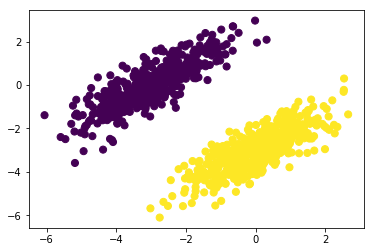

In [3]:
# 参考情報 https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(concatenated_data[:,0], concatenated_data[:,1], s=50, c=concatenated_data[:,2], marker='o')
plt.show()